# TC Starter for waveform generator

In [1]:
# Load Extensions

# cpu line profiler
%load_ext line_profiler
# memory profiler
%load_ext memory_profiler
# Cython support
%load_ext Cython

# Reload modules before executing user code
%load_ext autoreload
%autoreload 2

# setup backend for matplotlibs plots
%matplotlib inline

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
sns.set()

In [3]:
def generateNoise(num_samples):
    """Generate random signal for each sample.
    
    Using normal distribution instead of uniform distribution for random function
    
    Args:
        num_samples (int): number of samples
    
    Returns:
        ndarray: array of floats from standard normal distirbution
    """
    
    return np.random.randn(num_samples)

In [4]:
def generateSignal(time_samples,frequency,addNoise=True):
    """Generate sinusoidal data.
    
    Generates pure sine waveform data and additional noise
    can be added to the waveform.
    
    Args:
        time_samples (ndarray): time samples, for every point a signal data point is generated
        freuency (int): signal frequency for one period
        addNoise (bool): true add noise to the pure signal.
        
    Returns:
        ndarray: either pure siganl or pure signal with noise
    """
    
    signal =  np.sin(2*np.pi*frequency*time_samples)
    
    if addNoise:
        return signal + generateNoise(len(time_samples))
    else:
        return signal
    

In [5]:
def generateTimeSamples(duration,rate):
    """Generate time series
    The series is the len of duration*rate
    
    Arags:
        duration (int): signal duration is seconds
        rate (int): sampling rate of the signal, how many points per second
        
    Returns:
        ndarray: Time series with a data point for each smapling point with in a second
    """
    return np.arange(0,duration,1/rate, dtype=np.float64) 

In [6]:
def processTimeSeriesData(duration,rate,frequency,addNoise=True):
    """Process data"""
    
    # generate time series
    time_samples = generateTimeSamples(duration,rate)
    
    # create pandas - init with time
    df = pd.DataFrame(data=time_samples, columns=['time'])
    
    # generate signal
    df['signal'] = generateSignal(df['time'].values,frequency,addNoise)
       
    # return data frame with signal
    return df

In [7]:
# set random seed for reproducibility
np.random.seed(1)

# length of sample in seconds
sample_duration = 2*60*60
# number of samples in a second
sample_rate = 44100
# sample oscillation with in a second
sample_frequency = 261.63 # Middle C since it sounds nice

In [8]:
%lprun -f processTimeSeriesData mainDF_with_noise = processTimeSeriesData(sample_duration,sample_rate,sample_frequency,True)

Timer unit: 1e-06 s

Total time: 10.6309 s
File: <ipython-input-6-fe83befdfe2b>
Function: processTimeSeriesData at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def processTimeSeriesData(duration,rate,frequency,addNoise=True):
     2                                               """Process data"""
     3                                               
     4                                               # generate time series
     5         1    1050599.0 1050599.0      9.9      time_samples = generateTimeSamples(duration,rate)
     6                                               
     7                                               # create pandas - init with time
     8         1        579.0    579.0      0.0      df = pd.DataFrame(data=time_samples, columns=['time'])
     9                                               
    10                                               # generate signal
    11         1    

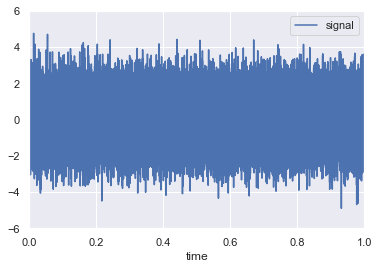

In [9]:
# filter and plot 1 second of data
ax = mainDF_with_noise[mainDF_with_noise.time <= 1].plot(kind='line',x='time',y='signal',ylim=(-6,6),grid=True)

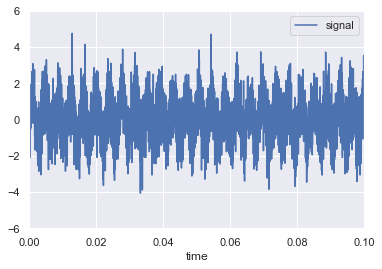

In [10]:
# filter and plot 0.1 second of data
ax =  mainDF_with_noise[mainDF_with_noise.time <= 0.1].plot(kind='line',x='time',y='signal',ylim=(-6,6),grid=True)

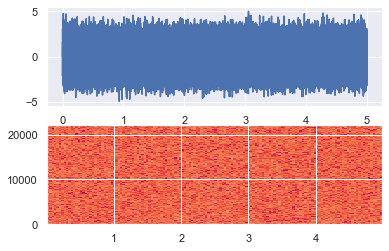

In [11]:
# Let's see how the signal looks in frequency domain
fqDF_noise = mainDF_with_noise[(mainDF_with_noise.time <= 5)] # look at only 5 seconds
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(fqDF_noise['time'], fqDF_noise['signal'])
ax2.specgram(fqDF_noise['signal'], NFFT=2048, Fs=sample_rate, noverlap=500)
plt.show()

In [12]:
Audio(fqDF_noise['signal'],rate=sample_rate)

In [13]:
%lprun -f processTimeSeriesData mainDF = processTimeSeriesData(sample_duration,sample_rate,sample_frequency,False)

Timer unit: 1e-06 s

Total time: 4.4634 s
File: <ipython-input-6-fe83befdfe2b>
Function: processTimeSeriesData at line 1

Line #      Hits         Time  Per Hit   % Time  Line Contents
     1                                           def processTimeSeriesData(duration,rate,frequency,addNoise=True):
     2                                               """Process data"""
     3                                               
     4                                               # generate time series
     5         1    1140814.0 1140814.0     25.6      time_samples = generateTimeSamples(duration,rate)
     6                                               
     7                                               # create pandas - init with time
     8         1        503.0    503.0      0.0      df = pd.DataFrame(data=time_samples, columns=['time'])
     9                                               
    10                                               # generate signal
    11         1    3

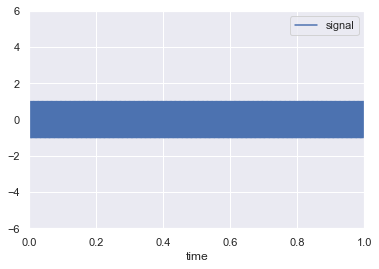

In [14]:
# filter and plot 1 second of data
ax = mainDF[mainDF.time <= 1].plot(kind='line',x='time',y='signal',ylim=(-6,6),grid=True)

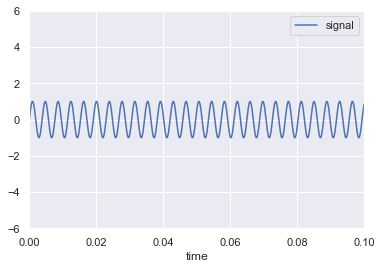

In [15]:
# filter and plot 0.1 second of data
ax =  mainDF[mainDF.time <= 0.1].plot(kind='line',x='time',y='signal',ylim=(-6,6),grid=True)

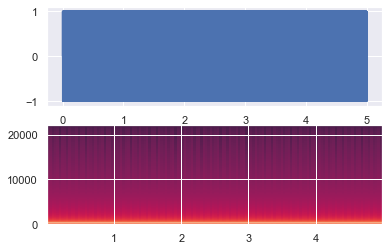

In [16]:
# Let's see how the signal looks in frequency domain
fqDF = mainDF[(mainDF.time <= 5)] # look at only 5 seconds
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(fqDF['time'], fqDF['signal'])
ax2.specgram(fqDF['signal'], NFFT=2048, Fs=sample_rate, noverlap=500)
plt.show()

In [17]:
Audio(fqDF['signal'],rate=sample_rate)